In [2]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from TargetDistributions.DoubleWell import DoubleWellEnergy
import torch
from FittedModels.utils.plotting_utils import plot_sampling_info, plot_divergences
torch.manual_seed(5)
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.utils.plotting_utils import plot_distributions
from FittedModels.train import LearntDistributionManager
from Utils.plotting_utils import plot_distribution
from Utils.numerical_utils import quadratic_function as expectation_function
from FittedModels.Models.FlowModel import FlowModel
from FittedModels.utils.plotting_utils import plot_history
import matplotlib.pyplot as plt
from FittedModels.utils.plotting_utils import plot_samples_vs_contours
torch.set_default_dtype(torch.float64)

In [ ]:
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours(*args, **kwargs)
    plt.show()

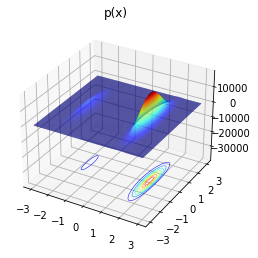

In [4]:
target = DoubleWellEnergy(2, a=-0.5, b=-6)
dist = plot_distribution(target, bounds=[[-3, 3], [-3, 3]], n_points=300)
plt.show()

# Alpha=2

In [5]:
torch.manual_seed(1)
# ******************* Parameters *******************
dim = 2
epochs = int(1e4)
n_samples_estimation = int(1e5)
batch_size = int(100)
lr = 1e-3
optimizer = "Adam"
loss_type = "DReG"  # "kl"  #
initial_flow_scaling = 2.0
n_flow_steps = 30
annealing = True
flow_type = "RealNVP"
n_plots = 10

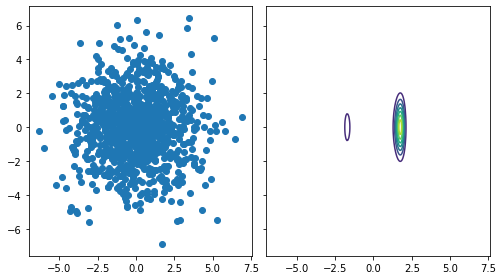

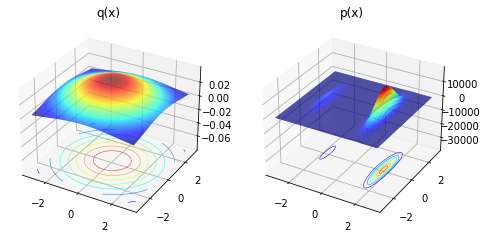

loss: -6.8388712810040015, mean log p_x -19.30061284814709:   0%|          | 0/10000 [00:00<?, ?it/s]

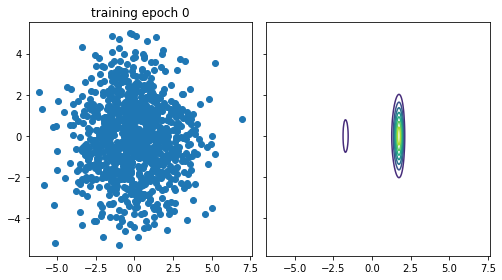

loss: -10.192738332927524, mean log p_x 7.917455460712266:  10%|█         | 1000/10000 [02:07<18:59,  7.90it/s] 

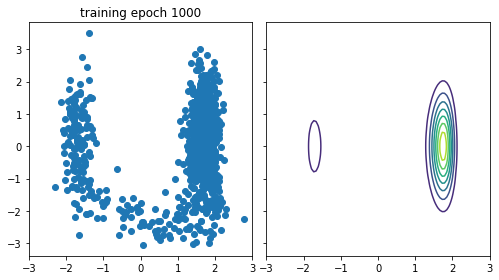

loss: -10.082158191441977, mean log p_x 8.438260690691322:  20%|██        | 2000/10000 [04:12<15:59,  8.34it/s]

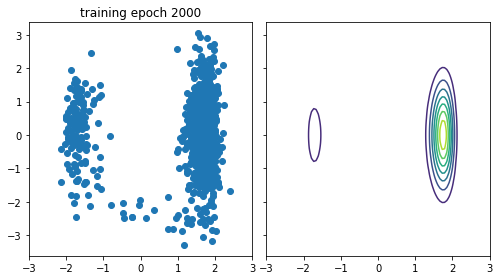

loss: -10.1409437172368, mean log p_x 8.423008349733392:  30%|███       | 3000/10000 [06:38<21:04,  5.53it/s]  

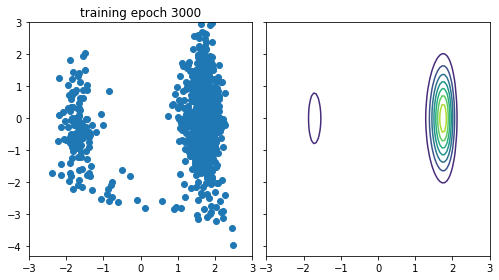

loss: -10.124056093854566, mean log p_x 8.466097244312753:  40%|████      | 4000/10000 [09:47<17:28,  5.72it/s]

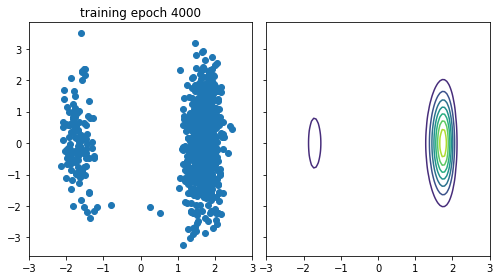

loss: -10.13997452137149, mean log p_x 8.399873803243688:  50%|█████     | 5000/10000 [12:45<14:37,  5.70it/s] 

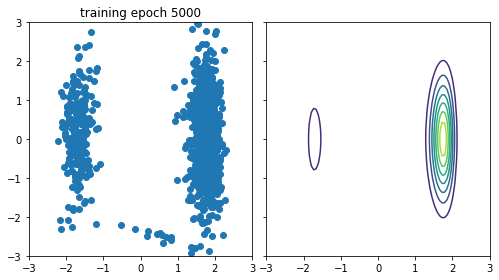

loss: -10.124547842592298, mean log p_x 8.587559547797799:  60%|██████    | 6000/10000 [15:41<11:33,  5.77it/s]

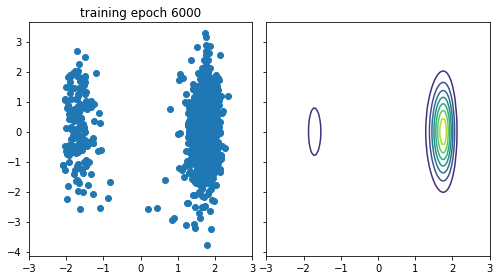

loss: -10.119207900016942, mean log p_x 8.419608078507487:  70%|███████   | 7000/10000 [18:36<08:34,  5.83it/s]

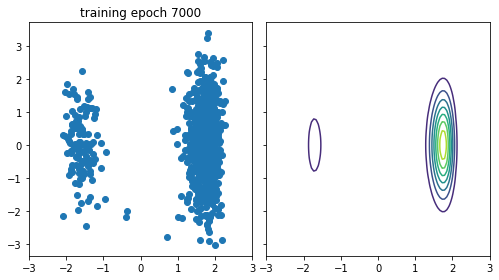

loss: -10.11601957863784, mean log p_x 8.615028341205278:  80%|████████  | 8000/10000 [21:32<05:43,  5.83it/s] 

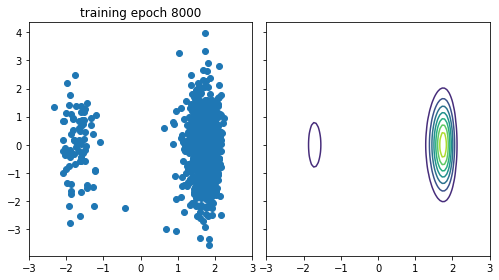

loss: -10.123184274736541, mean log p_x 8.402027457816365:  90%|█████████ | 9000/10000 [24:29<02:51,  5.82it/s]

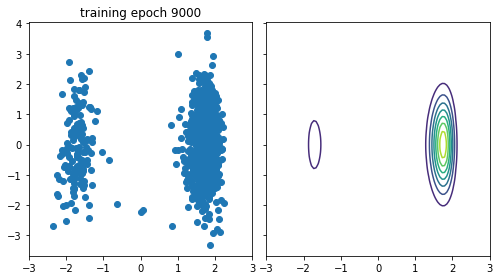

loss: -10.155417520286914, mean log p_x 8.300869017560649: 100%|██████████| 10000/10000 [27:25<00:00,  6.08it/s]


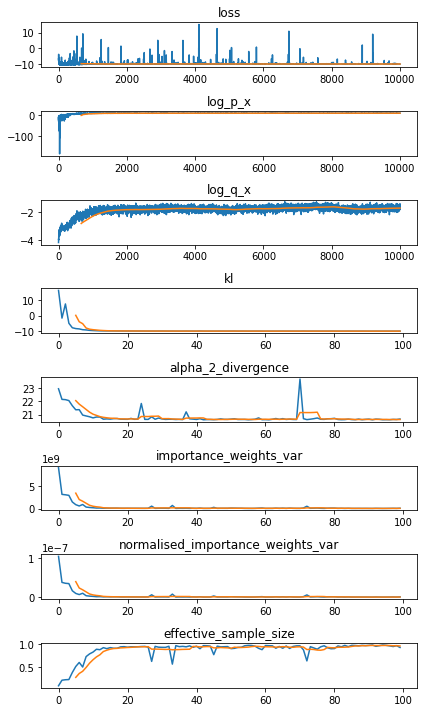

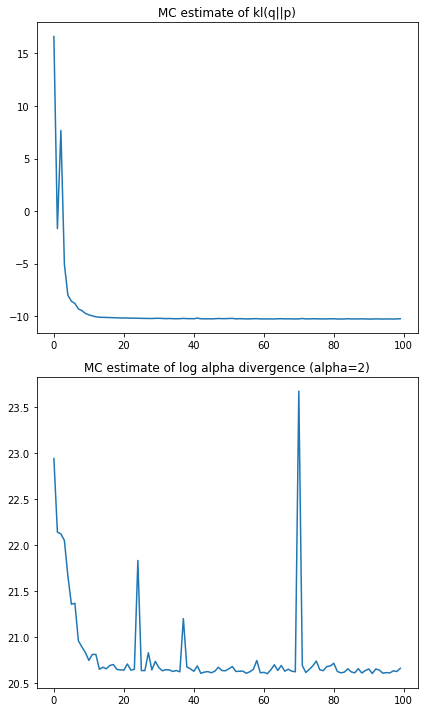

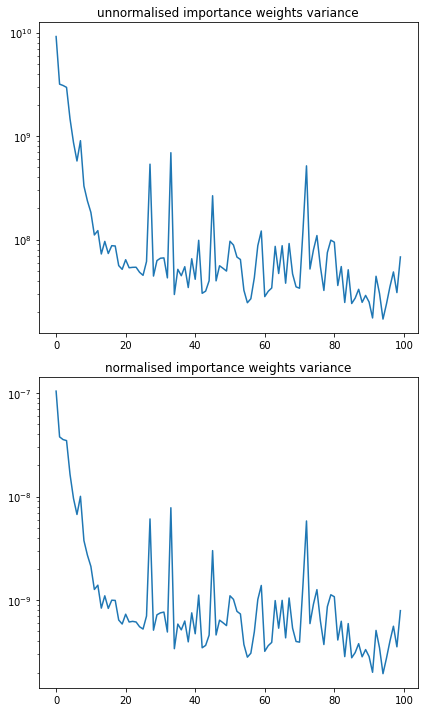

estimate before training is 12.76465931820077 
estimate after training is 13.0065245801193 
effective sample size before is 0.09064822850562274
effective sample size after train is 0.9372848419043036
variance in weights is 6.6912194084056384e-12


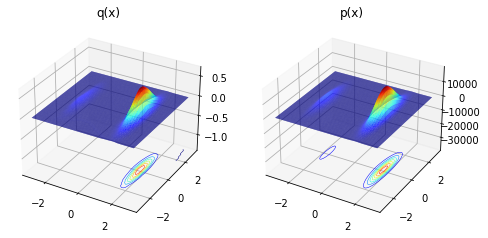

In [6]:
torch.manual_seed(0)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)
plt.show()
history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=True, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)
plot_history(history)
plt.show()
plot_divergences(history)
plt.show()
plot_sampling_info(history)
plt.show()

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")

plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)
plt.show()


# KL

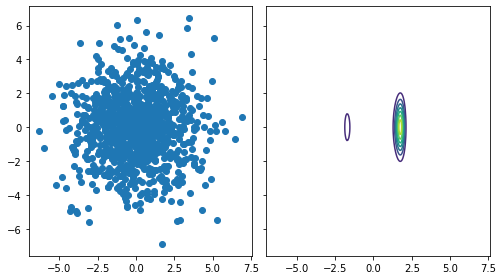

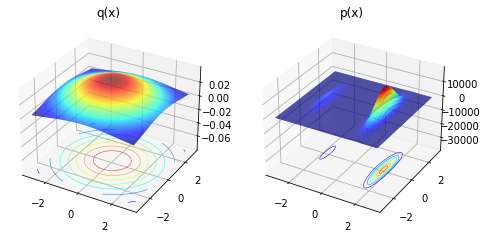

loss: -4.174350652541689, mean log p_x -19.30061284814709:   0%|          | 0/10000 [00:00<?, ?it/s]

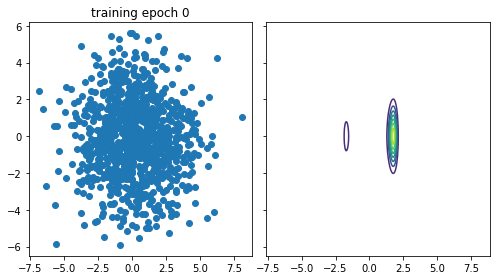

loss: -4.380199496219658, mean log p_x 2.8674997679390573:  10%|█         | 1000/10000 [02:37<26:08,  5.74it/s] 

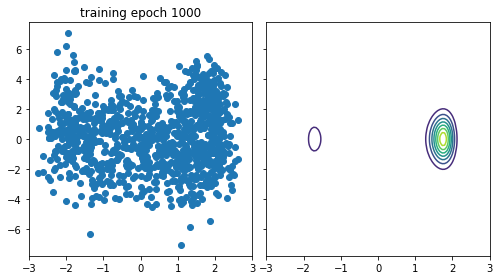

loss: -5.48719675443091, mean log p_x 6.2289806043399985:  20%|██        | 2000/10000 [05:34<22:48,  5.85it/s] 

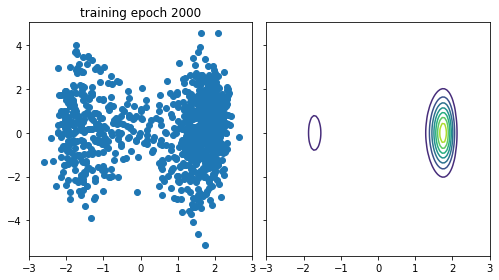

loss: -6.9066917264767795, mean log p_x 6.880360530602677:  30%|███       | 3000/10000 [08:29<20:12,  5.77it/s]

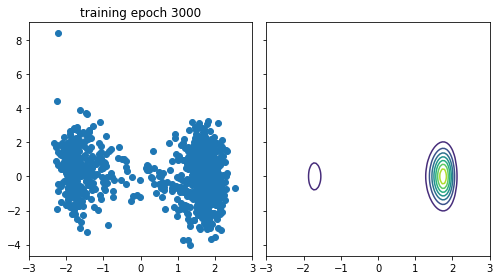

loss: -8.572768302905361, mean log p_x 8.189448387558627:  40%|████      | 4000/10000 [11:07<14:57,  6.68it/s] 

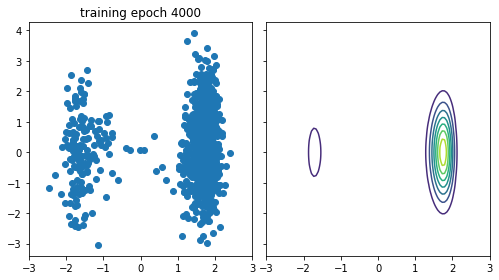

loss: -10.257455487673571, mean log p_x 8.554220819805554:  50%|█████     | 5000/10000 [13:32<11:40,  7.13it/s]

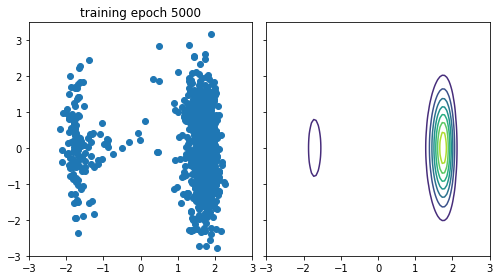

loss: -10.16984409899237, mean log p_x 8.444217992761583:  60%|██████    | 6000/10000 [15:57<09:59,  6.68it/s] 

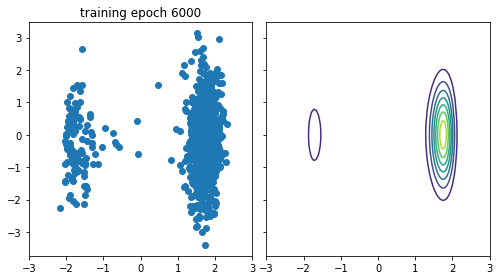

loss: -10.287728547991287, mean log p_x 8.623899352600878:  70%|███████   | 7000/10000 [18:21<06:34,  7.61it/s]

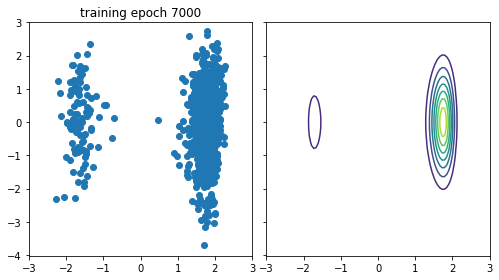

loss: -10.2220520543398, mean log p_x 8.520405232874493:  80%|████████  | 8000/10000 [20:46<04:37,  7.20it/s]  

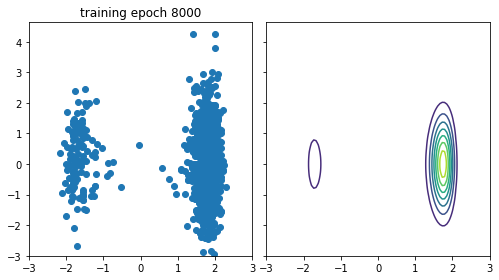

loss: -10.277508441756627, mean log p_x 8.51135283396459:  90%|█████████ | 9000/10000 [23:12<02:26,  6.85it/s] 

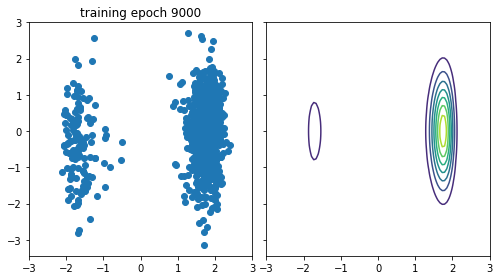

loss: -10.17434156942048, mean log p_x 8.336640024194683: 100%|██████████| 10000/10000 [25:36<00:00,  6.51it/s]


NaN encountered in importance_weights_var history
NaN encountered in normalised_importance_weights_var history
NaN encountered in effective_sample_size history


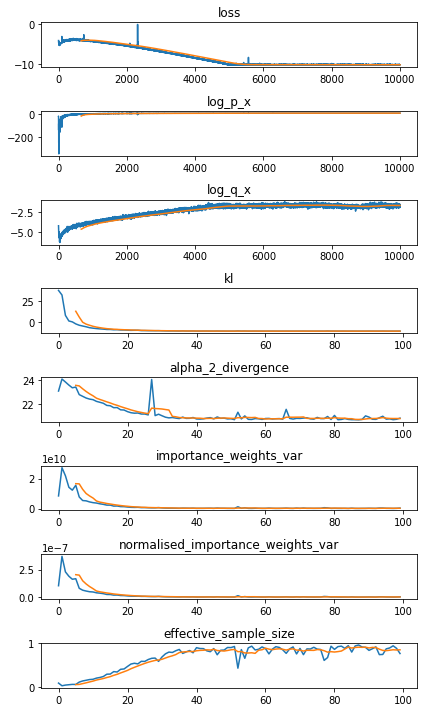

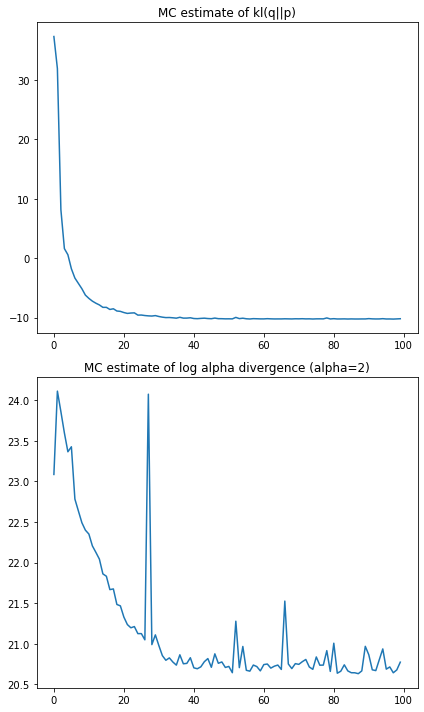

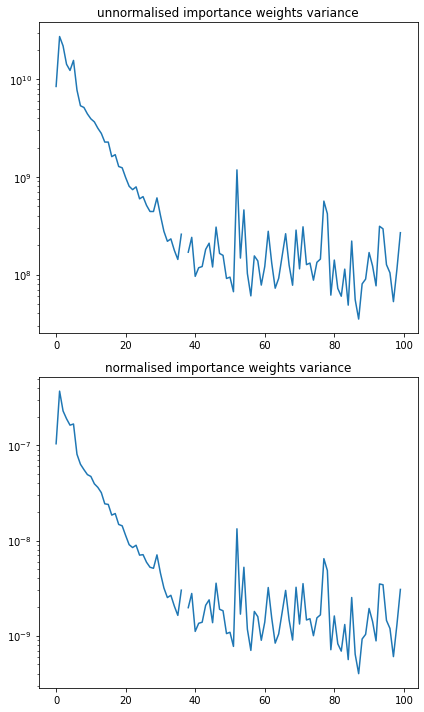

estimate before training is 12.76465931820077 
estimate after training is 12.997169769922657 
effective sample size before is 0.09064822850562274
effective sample size after train is 0.9325498331737122
variance in weights is 7.232947659767285e-12


ValueError: The value argument must be within the support

In [7]:
torch.manual_seed(1)
# ******************* Parameters *******************
dim = 2
epochs = int(1e4)
n_samples_estimation = int(1e5)
batch_size = int(100)
lr = 1e-3
optimizer = "Adam"
loss_type = "kl"
initial_flow_scaling = 2.0
n_flow_steps = 30
annealing = True
flow_type = "RealNVP"
n_plots = 10
def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours(*args, **kwargs)
    plt.show()

torch.manual_seed(0)  # 0
learnt_sampler = FlowModel(x_dim=dim, n_flow_steps=n_flow_steps,
                           scaling_factor=initial_flow_scaling, flow_type=flow_type)
tester = LearntDistributionManager(target, learnt_sampler, VanillaImportanceSampling, loss_type=loss_type,
                                   lr=lr, optimizer=optimizer, annealing=annealing)

plot_samples_vs_contours(tester)
plt.show()
expectation_before, info_before = tester.estimate_expectation(n_samples_estimation, expectation_function)

plot_distributions(tester, bounds=[[-3, 3], [-3, 3]], n_points=100)
plt.show()
history = tester.train(epochs, batch_size=batch_size, clip_grad_norm=True, max_grad_norm=1,
                       intermediate_plots=True, plotting_func=plotter, n_plots=n_plots)
plot_history(history)
plt.show()
plot_divergences(history)
plt.show()
plot_sampling_info(history)
plt.show()

expectation, info = tester.estimate_expectation(n_samples_estimation, expectation_function)
print(f"estimate before training is {expectation_before} \n"
      f"estimate after training is {expectation} \n"
      f"effective sample size before is {info_before['effective_sample_size'] / n_samples_estimation}\n"
      f"effective sample size after train is {info['effective_sample_size'] / n_samples_estimation}\n"
      f"variance in weights is {torch.var(info['normalised_sampling_weights'])}")


